### import necessary libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
lable=KMeans
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierar
import seaborn as sns

### Load data from an Excel file

In [2]:
    df_Customer_sales=pd.read_excel('RFM.xlsx')

In [3]:
df_Customer_sales.head()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
0,5209875,2023-05-16,19,648825.0,3000618.4,13
1,5209932,2022-07-30,4,593721.0,1201646.0,44
2,5209932,2022-08-17,4,595165.0,1189296.0,44
3,5209932,2022-05-05,2,585977.0,1408396.0,44
4,5209932,2022-05-04,3,585909.0,1193396.0,44


### Remove row with missing CustomerCode

In [4]:
df_Customer_sales.dropna(subset=['CustomerCode'], how='all', inplace=True)
df_Customer_sales.shape

(57310, 6)

### Check data type and null values

In [5]:
df_Customer_sales.dtypes

CustomerCode                 int64
CreatedDate         datetime64[ns]
QtyFinal                     int64
orderIncrementId           float64
SaleAmount                 float64
productdiversity             int64
dtype: object

In [6]:
df_Customer_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57310 entries, 0 to 57309
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerCode      57310 non-null  int64         
 1   CreatedDate       57310 non-null  datetime64[ns]
 2   QtyFinal          57310 non-null  int64         
 3   orderIncrementId  56777 non-null  float64       
 4   SaleAmount        57310 non-null  float64       
 5   productdiversity  57310 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 2.6 MB


In [7]:
df_Customer_sales.isnull().sum().sort_values(ascending=False)

orderIncrementId    533
CustomerCode          0
CreatedDate           0
QtyFinal              0
SaleAmount            0
productdiversity      0
dtype: int64

### Filter data base on quantity and sale amount

In [8]:
df_Customer_sales = df_Customer_sales[(df_Customer_sales['QtyFinal'] > 0) & (df_Customer_sales['SaleAmount'] > 0)]
df_Customer_sales.describe()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
count,5.731000e+04,57310,57310.000000,56777.000000,5.731000e+04,57310.000000
mean,5.363085e+06,2022-08-25 14:28:41.919385856,6.147322,604878.829420,1.617196e+06,52.032682
min,5.209875e+06,2021-04-06 00:00:00,1.000000,548779.000000,1.049396e+06,1.000000
25%,5.333035e+06,2022-01-21 00:00:00,2.000000,575113.000000,1.253832e+06,2.000000
50%,5.380286e+06,2022-11-02 00:00:00,3.000000,604558.000000,1.399396e+06,7.000000
75%,5.404716e+06,2023-03-07 00:00:00,5.000000,633743.000000,1.647971e+06,29.000000
max,5.451709e+06,2023-07-16 00:00:00,52001.000000,662666.000000,1.382334e+08,1487.000000
std,6.274433e+04,NaN,217.612785,33427.532137,1.777486e+06,176.961383


### Remove duplicate row 

In [9]:
df_Customer_sales = df_Customer_sales.drop_duplicates()
df_Customer_sales.shape

(57310, 6)

In [10]:
min_date = df_Customer_sales['CreatedDate'].min()
max_date = df_Customer_sales['CreatedDate'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2021-04-06 00:00:00
Maximum Date: 2023-07-16 00:00:00


In [11]:
today = date.today()
print("Today's date:", today)

Today's date: 2023-10-26


### Convert  'CreatedDate' into datetime

In [12]:
In [32]: df_Customer_sales['CreatedDate'] = df_Customer_sales['CreatedDate'].astype('datetime64[ns]')
df_Customer_sales
# df_Customer_sales['CreatedDate'] = pd.to_datetime(df_Customer_sales['CreatedDate'])


,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
0,5209875,2023-05-16,19,648825.0,3000618.4,13
1,5209932,2022-07-30,4,593721.0,1201646.0,44
2,5209932,2022-08-17,4,595165.0,1189296.0,44
3,5209932,2022-05-05,2,585977.0,1408396.0,44
4,5209932,2022-05-04,3,585909.0,1193396.0,44
...,...,...,...,...,...,...
57305,5451672,2023-07-16,2,662657.0,1734396.0,1
57306,5451684,2023-07-16,4,662651.0,1682946.0,3
57307,5451690,2023-07-16,2,662662.0,1114296.0,1
57308,5451690,2023-07-16,2,662659.0,1114296.0,1


In [13]:
print(type(today))
print(type(df_Customer_sales['CreatedDate']))

<class 'datetime.date'>
<class 'pandas.core.series.Series'>


### Calculate reecency as the difference between today and 'CreateDate'

In [14]:
df_Customer_sales['history_day'] = (pd.to_datetime(today) - df_Customer_sales['CreatedDate']).dt.days
df_Customer_sales.head()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity,history_day
0,5209875,2023-05-16,19,648825.0,3000618.4,13,163
1,5209932,2022-07-30,4,593721.0,1201646.0,44,453
2,5209932,2022-08-17,4,595165.0,1189296.0,44,435
3,5209932,2022-05-05,2,585977.0,1408396.0,44,539
4,5209932,2022-05-04,3,585909.0,1193396.0,44,540


In [15]:
df_Customer_sales['CreatedDate'] = pd.to_datetime(df_Customer_sales['CreatedDate']).dt.floor('D').tolist()

### Group data by 'CustomerCode' and aggregate RFM metric

In [16]:
df_RFM = df_Customer_sales.groupby('CustomerCode').agg({
    'history_day': 'min',         # Recency
    'orderIncrementId': 'count',  # Frequency (number of orders)
    'SaleAmount': 'sum',         # Monetary Value (total sales amount)
    'productdiversity': 'max'    # Maximum product diversity
}).reset_index()


### Rename column for clarity

In [17]:
df_RFM = df_RFM.rename(columns={
    'CustomerCode': 'CustomerCode',
    'history_day': 'Recency',
    'orderIncrementId': 'Frequency',
    'SaleAmount': 'Monetary',
    'productdiversity': 'Productdiversity'
})

### Calculate quartiles for further analytic

In [18]:
quartiles = df_RFM.quantile([0.25, 0.50, 0.75]).to_dict()
print(quartiles)

{'CustomerCode': {0.25: 5374749.75, 0.5: 5391138.5, 0.75: 5414764.75}, 'Recency': {0.25: 202.0, 0.5: 319.0, 0.75: 573.0}, 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0}, 'Monetary': {0.25: 1289396.0, 0.5: 1530471.0, 0.75: 2568890.5}, 'Productdiversity': {0.25: 1.0, 0.5: 3.0, 0.75: 6.0}}


### Define the RClass function to categorize Recency (R) and Define FMDClass function to categorize Frequency and Monetary Value(F and M)

In [19]:
def RClass(x,p,d):

    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# for Frequency and Monetary value 

def FMDClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1



### Create an 'RFMClass' column by combining R, F, and M quartiles

In [20]:
RFM_Segmentation = df_RFM
RFM_Segmentation['R_Quartile'] = RFM_Segmentation['Recency'].apply(RClass, args=('Recency',quartiles,))
RFM_Segmentation['F_Quartile'] = RFM_Segmentation['Frequency'].apply(FMDClass, args=('Frequency',quartiles,))
RFM_Segmentation['M_Quartile'] = RFM_Segmentation['Monetary'].apply(FMDClass, args=('Monetary',quartiles,))
RFM_Segmentation['Productdiversity']  = RFM_Segmentation['Productdiversity'].apply(FMDClass, args=('Productdiversity',quartiles,))

In [21]:
RFM_Segmentation['RFMClass'] = RFM_Segmentation['R_Quartile'].astype(str) + \
                               RFM_Segmentation['F_Quartile'].astype(str) + \
                               RFM_Segmentation['M_Quartile'].astype(str)

In [22]:
RFM_Segmentation.head(2)

,CustomerCode,Recency,Frequency,Monetary,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,5209875,163,1,3000618.4,1,1,4,1,141
1,5209932,417,16,80046926.0,1,3,1,1,311


### Sort the data base on RFMClass and monetary value

In [23]:
RFM_Segmentation.sort_values(by=['RFMClass', 'Monetary'], ascending=[True, False])

,CustomerCode,Recency,Frequency,Monetary,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass
9634,5379404,102,712,1.158809e+09,1,1,1,1,111
3,5209949,103,256,4.839483e+08,1,1,1,1,111
29,5210492,145,10,2.819469e+08,1,1,1,1,111
2506,5279643,103,145,2.001806e+08,1,1,1,1,111
936,5231136,111,141,1.920693e+08,1,1,1,1,111
...,...,...,...,...,...,...,...,...,...
8574,5377131,734,1,1.049396e+06,4,4,4,4,444
8951,5378214,691,1,1.049396e+06,4,4,4,4,444
9652,5379435,666,1,1.049396e+06,3,4,4,4,444
11625,5382497,639,1,1.049396e+06,4,4,4,4,444


### Calculate the count of each RFMClass

In [24]:
RFM_Segmentation.groupby('RFMClass').agg('F_Quartile').count()

RFMClass
111    2557
112      88
141     548
142    2274
143    1342
144    1023
211    1800
212     158
241     420
242    2054
243    1911
244    1418
311    1154
312     170
341     155
342    1673
343    2522
344    2056
411    1050
412     400
441      86
442     953
443    1942
444    3326
Name: F_Quartile, dtype: int64

### Calculate the total score by suming R, F, nad M quartiles

In [25]:
RFM_Segmentation['Total Score'] = RFM_Segmentation['R_Quartile'] + RFM_Segmentation['F_Quartile'] + RFM_Segmentation['M_Quartile']
top_2_records = RFM_Segmentation.head(2)
print(top_2_records)

   CustomerCode  Recency  Frequency    Monetary  Productdiversity  R_Quartile  \
0       5209875      163          1   3000618.4                 1           1   
1       5209932      417         16  80046926.0                 1           3   

   F_Quartile  M_Quartile RFMClass  Total Score  
0           4           1      141            6  
1           1           1      311            5  


### Calculate the mean product diversity for each total score and create  a bar plot

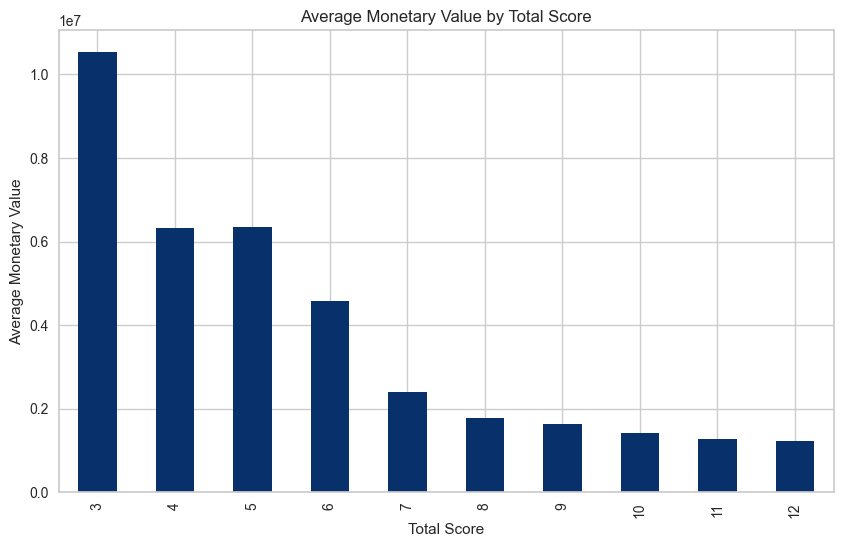

In [26]:
RFM_Segmentation.groupby('Total Score').agg('Monetary').mean().plot(kind='bar', colormap='Blues_r')
average_monetary_by_score = RFM_Segmentation.groupby('Total Score')['Monetary'].mean()
average_monetary_by_score.plot(kind='bar', colormap='Blues_r', figsize=(10, 6))
plt.xlabel('Total Score')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Total Score')
plt.show()

<Axes: xlabel='Total Score'>

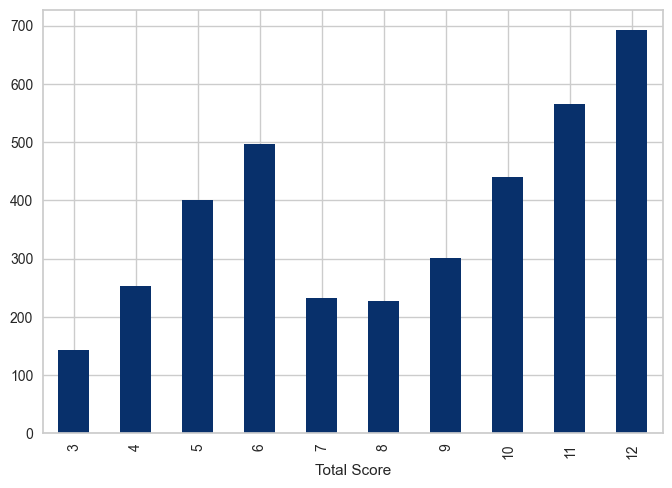

In [27]:
RFM_Segmentation.groupby('Total Score').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total Score'>

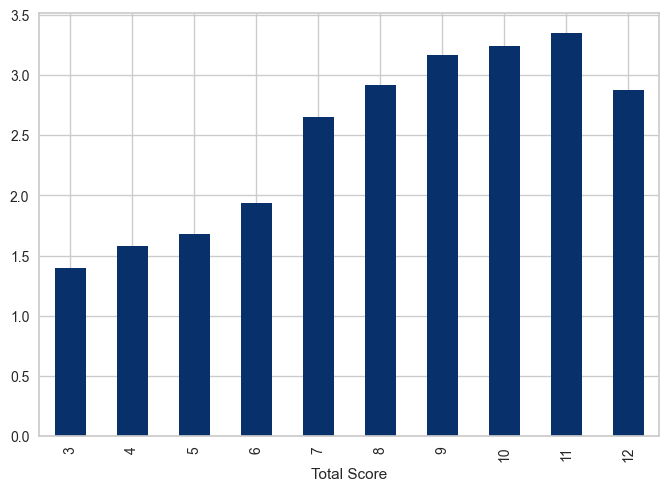

In [28]:
RFM_Segmentation.groupby('Total Score').agg('Productdiversity').mean().plot(kind='bar', colormap='Blues_r')

In [29]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['Total Score'], c=colors[n-1]) #clustered_df['recency'], 
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

In [30]:
RFM_Segmentation.iloc[5:,0:3]

,CustomerCode,Recency,Frequency
5,5209967,643,4
6,5209974,683,2
7,5209975,315,12
8,5209983,664,1
9,5209992,644,2
...,...,...,...
31075,5451665,102,1
31076,5451672,102,1
31077,5451684,102,1
31078,5451690,102,2


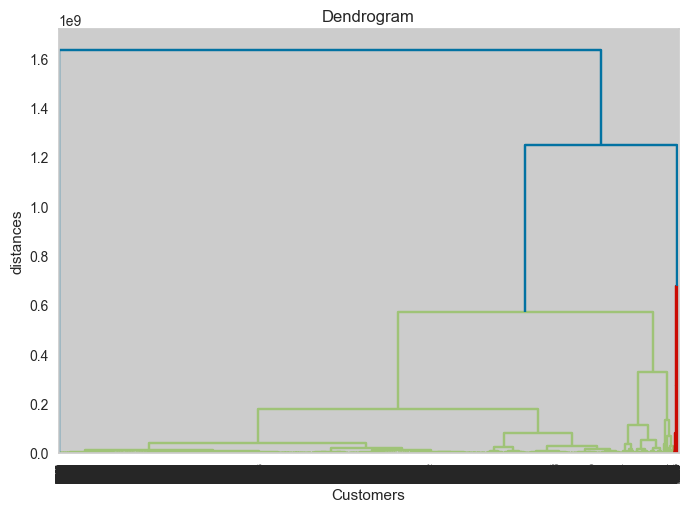

In [31]:
dendrogram = hierar.dendrogram(hierar.linkage(RFM_Segmentation.iloc[:,3:].values, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

### determine the optimal number of clusters using the Elbow method

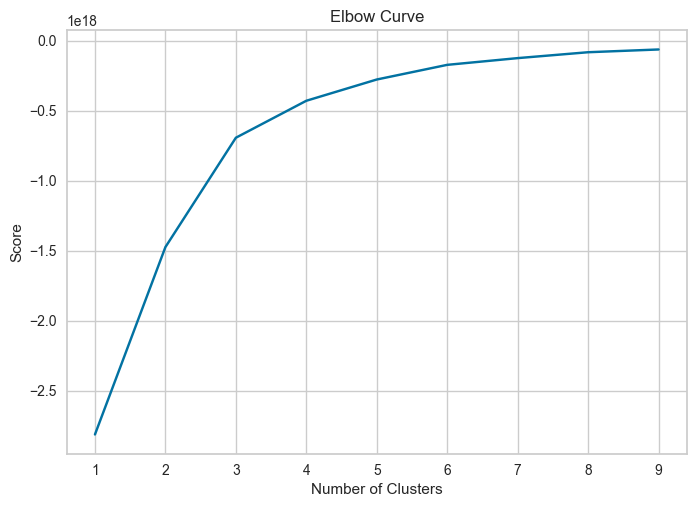

In [32]:
from sklearn.cluster import KMeans
Nc = range(1, 10)
# Create K-Means models for each cluster number
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc] 
score = [kmeans[i].fit(RFM_Segmentation).score(RFM_Segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Perform KMeans clustering with 4clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(RFM_Segmentation)

In [ ]:
RFM_Segmentation['Cluster'] = kmeans.labels_
RFM_Segmentation

In [ ]:
print("Number of Cluster: ", RFM_Segmentation['Cluster'].nunique())

In [ ]:
RFM_Segmentation[RFM_Segmentation.Cluster == 0].head(10)

### Create scatter plotsfor varous combinationof variabloes

In [ ]:
    plt.figure(1 , figsize = (15 , 7))
    n = 0 
    for x in ['Recency' , 'Frequency' , 'Monetary']:
        for y in ['Recency' , 'Frequency' , 'Monetary']:
            n += 1
            plt.subplot(3 , 3 , n)
            plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
            sns.regplot(x = x , y = y , data = RFM_Segmentation)
            plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
    plt.show()

In [36]:
RFM_Segmentation.to_excel('RFM_Output.xlsx')